# ISS Projekt 2023/24

Honza Pavlus, Honza Brukner a Honza Černocký, ÚPGM FIT VUT

6.11. 2023



## 1. Úvod

V projektu budete pracovat se biomedicínskými signály a to konkrétně se signálem elektrokardiogramu EKG. Vyzkoušíte si filtraci tohoto druhu signálu, abyste dostali krásné EKG křivky, které můžete vidět ve filmech. Dále si zkusíte vybudovat jednoduchý, ale účinný detektor QRS a ti, kteří se vrhnou i na bonusový úkol, si zkusí odhalit srdeční patologii. K dispozici dostanete každý 3 nahrávky jednokanálového EKG signálu, jeden zdravý a dva s různými patologiemi.

Projekt je nejlépe možno řešit v Python-u a to přímo v dodaném Python notebooku, který si můžete zkopírovat do vlastního Google Colabu. Projekt je také možno řešit v Matlab-u, Octave, Julii, jazyce C, Java nebo v libovolném jiném programovacím či skriptovacím jazyce. Je možné použít libovolné knihovny. Projekt se nezaměřuje na “krásu programování”, není tedy nutné mít vše úhledně zabalené do okomentovaných funkcí (samozřejmě se ale okomentovaný kód lépe opravuje a to hlavně v případě podivných výsledků), ošetřené všechny chybové stavy, atd. Důležitý je výsledek.

**Vaši práci odevzdáváte vyexportovanou do dvou souborů: (1) do PDF souboru login.pdf, (2) do Python notebooku login.ipynb. PDF musí obsahovat výsledky prokazatelně vytvořené Vaším kódem.** V případě řešení projektu v jiném jazyce nebo prostředí než v dodaném Python notebooku, je prvním souborem protokol v PDF, druhý soubor je archiv s Vaším kódem. Ten musí být spustitelný na standardní fakultní distribuci Windows nebo Linuxu.

## 2. Teorie - před odevzdáním prosíme smazat včetně ilustračních obrázků.

Pokud znáte základní teorii okolo EKG signálů, můžete tuhle část přeskočit. Teorie je doopravdy stručná, neboť teorie EKG není cílem tohoto předmětu.

EKG signál má několik základních částí:
  

1.   P vlnu, která značí počátek kontrakce předsíní
2.   QRS komplex vln, který vzniká depolarizací komor (jejich stažením)
3.   T vlna jako poslední představuje repolarizaci komor (tedy jejich zpětné roztažení)

Nás bude zajímat především QRS komplex, který se ve spektru nachází mezi 10 Hz a 20 Hz. Z polohy QRS lze určit RR interval - vzdálenost mezi jednotlivými R vlnami. RR interval je přímo spojený se srdečním tepem. Na obrázku spektra EKG signálu můžete také vidět, na kterých frekvencích se nachází P a T vlna, kterou my ale v projektu odfiltrujeme.

EKG se snímá v několika základních rozloženích elektrodových svodů. V nemocnici se potkáte nejčastěji s 12 svodovým EKG. V projektu dostanete jeden z těchto svodů.


#### Popis EKG





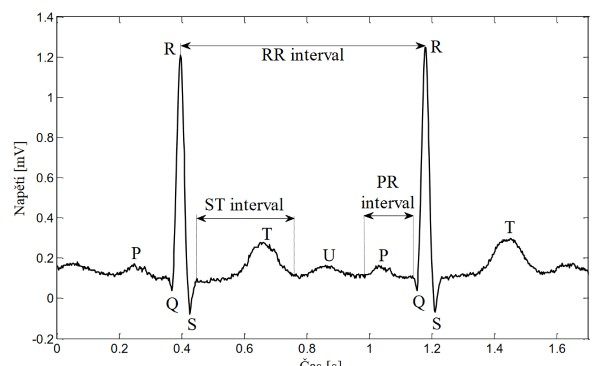

#### EKG ve spektru

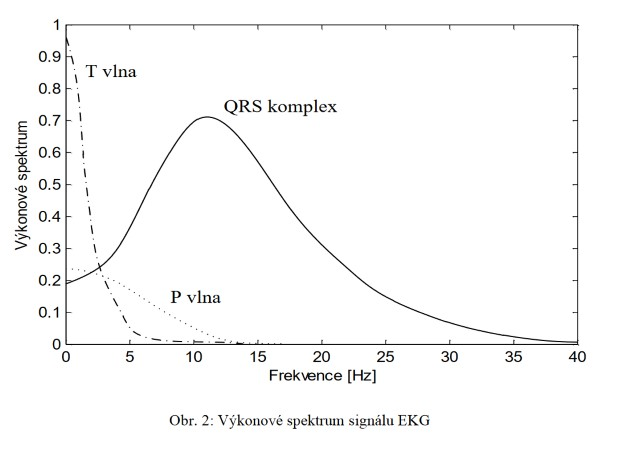

## 3. Vstup
Pro řešení projektu má každý student/ka k disposici osobní soubor se  zdravým signálem (sinusovým rytmem): ***login.wav***, kde login je váš xlogin popřípadě VUT číslo (pro studenty FSI). Dále jsou k disposici  ještě další dva signály: ***FIS.wav*** a ***KES.wav***. První signál obsahuje fibrilaci a druhý komorovou extrasystolu. Tyhle dva soubory jsou pro všechny společné a využijete je při řešení bonusového úkolu.

In [131]:
#Načtení Vašeho signálu - xlogin99 nahraďte Vaším loginem
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftshift
from scipy.signal import find_peaks, resample, butter, filtfilt, freqz, tf2zpk, spectrogram

!wget https://www.fit.vutbr.cz/study/courses/ISS/public/proj2023-24/xlitvi02.wav
!wget https://www.fit.vutbr.cz/study/courses/ISS/public/proj2023-24/FIB.wav
!wget https://www.fit.vutbr.cz/study/courses/ISS/public/proj2023-24/KES.wav

x, fs = sf.read("xlitvi02.wav")


--2023-12-16 11:21:13--  https://www.fit.vutbr.cz/study/courses/ISS/public/proj2023-24/xlitvi02.wav
Resolving www.fit.vutbr.cz (www.fit.vutbr.cz)... 147.229.9.23, 2001:67c:1220:809::93e5:917
Connecting to www.fit.vutbr.cz (www.fit.vutbr.cz)|147.229.9.23|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10044 (9.8K) [audio/x-wav]
Saving to: ‘xlitvi02.wav.2’

xlitvi02.wav.2      100%[===================>]   9.81K  --.-KB/s    in 0s      

2023-12-16 11:21:14 (186 MB/s) - ‘xlitvi02.wav.2’ saved [10044/10044]

--2023-12-16 11:21:15--  https://www.fit.vutbr.cz/study/courses/ISS/public/proj2023-24/FIB.wav
Resolving www.fit.vutbr.cz (www.fit.vutbr.cz)... 147.229.9.23, 2001:67c:1220:809::93e5:917
Connecting to www.fit.vutbr.cz (www.fit.vutbr.cz)|147.229.9.23|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10044 (9.8K) [audio/x-wav]
Saving to: ‘FIB.wav.2’

FIB.wav.2           100%[===================>]   9.81K  --.-KB/s    in 0s      

2023-12-1

## 4. Úkoly



### 4.1. [2.5b] Nahrání a zobrazení EKG signálu

Nezapomeňte na popisy os u jednotlivých grafů.

 a) [1b] Nahrajte EKG signál login.wav, vyberte 5-sekundový úsek a zobrazte ho v časové doméně. Pro nahrání signálu použijte knihovny numpy a soundfile.

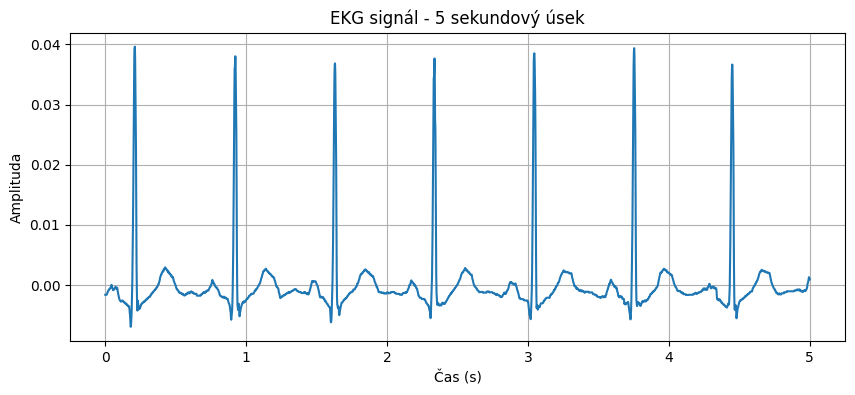

In [132]:
# Výběr 5-sekundového úseku
start_time = 0
end_time = 5
selected_segment = x[int(start_time * fs):int(end_time * fs)]

# Zobrazení v časové doméně
time_axis = np.linspace(start_time, end_time, len(selected_segment))
plt.figure(figsize=(10, 4))
plt.plot(time_axis, selected_segment)
plt.title('EKG signál - 5 sekundový úsek')
plt.xlabel('Čas (s)')
plt.ylabel('Amplituda')
plt.grid(True)
plt.show()

b) [1b] Spočítejte spektrum z 5 sekundového úseku nahraného signálu a zobrazte jej.

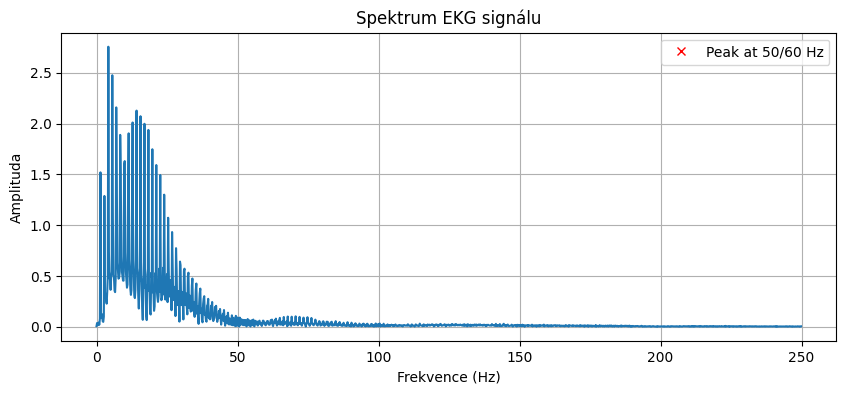

In [133]:
# Spočítání spektra
n = len(selected_segment)
freq = np.fft.fftfreq(n, 1/fs)
spectrum = np.abs(fft(selected_segment))

# Zobrazení spektra
plt.figure(figsize=(10, 4))
plt.plot(freq[:n//2], spectrum[:n//2])
plt.title('Spektrum EKG signálu')
plt.xlabel('Frekvence (Hz)')
plt.ylabel('Amplituda')
plt.grid(True)

# Identifikace a zvýraznění frekvence 50 Hz nebo 60 Hz
peaks, _ = find_peaks(spectrum[:n//2], height=1000)
plt.plot(freq[peaks], spectrum[peaks], 'rx', label='Peak at 50/60 Hz')

plt.legend()
plt.show()

 c) [0.5b] Ve spektru vidíte rušení na 50Hz nebo 60Hz a jejich harmonických frekvencích. Vysvětlete, čím je způsobeno.

Rušení na 50 Hz nebo 60 Hz a jejich harmonických frekvencích je způsobeno elektrickým rušením v okolí, které může být generováno elektrickými přístroji, napájecí sítí nebo jinými elektrickými zařízeními. Toto rušení může pronikat do EKG signálu a ovlivňovat jeho spektrum.

### 4.2. [3b] Převzorkujte nahraný signál



a) [2b] Převzorkujte signál na vzorkovací frekvenci 100 Hz, nezapomeňte na filtr pro antialiasing. Můžete například odstranit část spektra od $\frac{Fs}{2}$ nebo použít filtr dolní propusti.

In [134]:
# Vzorkovací frekvence po převzorkování
fs_resampled = 100

# Filtr pro antialiasing (dolní propust)
cutoff_freq = 0.5 * fs_resampled  # Nyquist frequency is 50 Hz
nyquist = 0.5 * fs
normal_cutoff = cutoff_freq / nyquist
b, a = butter(4, normal_cutoff, btype='low', analog=False)

# Převzorkování signálu
resampled_signal = resample(selected_segment, int(len(x) * fs_resampled / fs))
filtered_signal = filtfilt(b, a, resampled_signal, padlen=150)

b) [1b] Zobrazte 5 sekundový úsek původního a převzorkovaného signálu v časové doméně a zobrazte i jejich spektra.

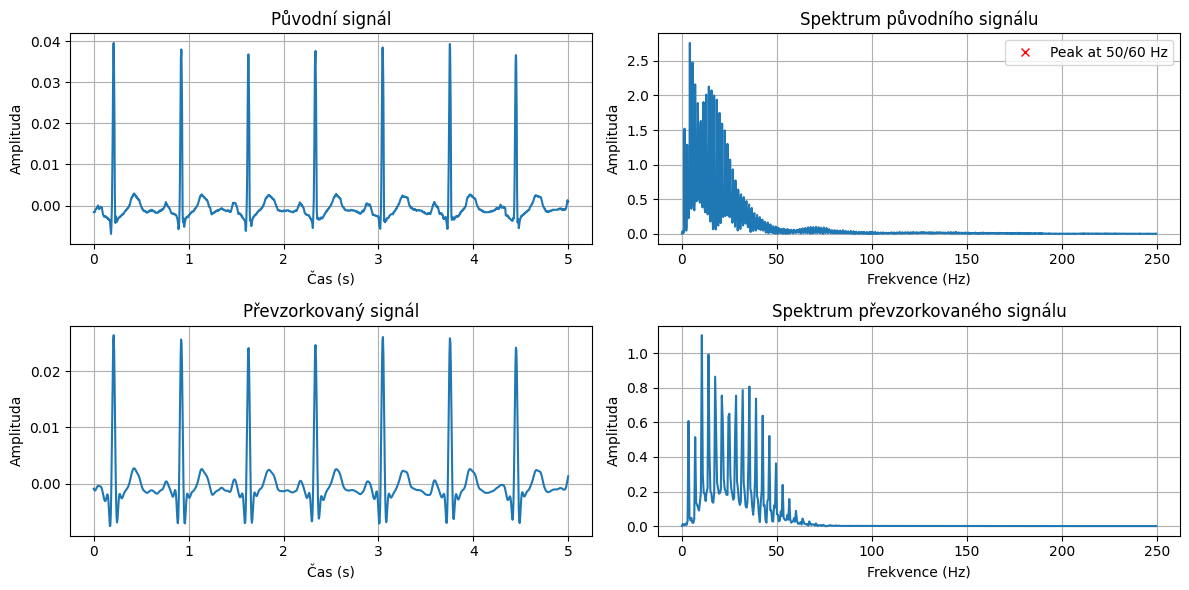

In [135]:
# Zobrazení původního signálu
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.plot(time_axis, selected_segment)
plt.title('Původní signál')
plt.xlabel('Čas (s)')
plt.ylabel('Amplituda')
plt.grid(True)

# Zobrazení spektra původního signálu
plt.subplot(2, 2, 2)
plt.plot(freq[:n//2], spectrum[:n//2])
plt.title('Spektrum původního signálu')
plt.xlabel('Frekvence (Hz)')
plt.ylabel('Amplituda')
plt.grid(True)
peaks, _ = find_peaks(spectrum[:n//2], height=1000)
plt.plot(freq[peaks], spectrum[peaks], 'rx', label='Peak at 50/60 Hz')
plt.legend()

# Zobrazení převzorkovaného signálu
time_axis_resampled = np.linspace(start_time, end_time, len(filtered_signal))
plt.subplot(2, 2, 3)
plt.plot(time_axis_resampled, filtered_signal)
plt.title('Převzorkovaný signál')
plt.xlabel('Čas (s)')
plt.ylabel('Amplituda')
plt.grid(True)

# Spočítání spektra převzorkovaného signálu
n_resampled = len(filtered_signal)
freq_resampled = np.fft.fftfreq(n_resampled, 1/fs)
spectrum_resampled = np.abs(fft(filtered_signal))

# Zobrazení spektra převzorkovaného signálu
plt.subplot(2, 2, 4)
plt.plot(freq_resampled[:n_resampled//2], spectrum_resampled[:n_resampled//2])
#plt.plot(np.fft.fftfreq(len(x_resampled), 1/fs_resampled)[:len(x_resampled)//2], spectrum_resampled[:len(x_resampled)//2])
plt.title('Spektrum převzorkovaného signálu')
plt.xlabel('Frekvence (Hz)')
plt.ylabel('Amplituda')
plt.grid(True)

plt.tight_layout()
plt.show()

### 4.3. [4b] Vyfiltrujte nahraný signál pásmovou propustí 10Hz-20Hz

  




a) [2b] Vytvořte filtr pásmové propusti, možnosti jsou dvě: buďto filtrovat pomocí klasického návrhu filtrů, kde získáte koeficienty `a` a `b` (pomocí např. scipy.butter) a zobrazíte charakteristiku filtru + nuly a póly. Nebo se můžete vydat cestou filtrování ve frekvenční doméně, frekvenční charakteristiku vykreslete pomocí spektrální masky.

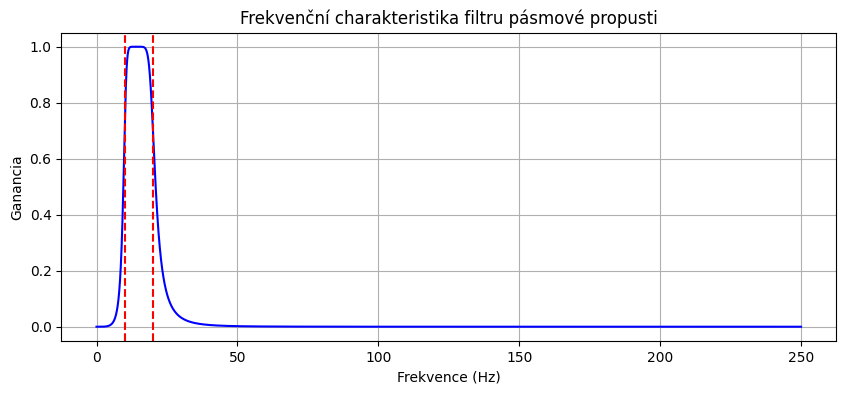

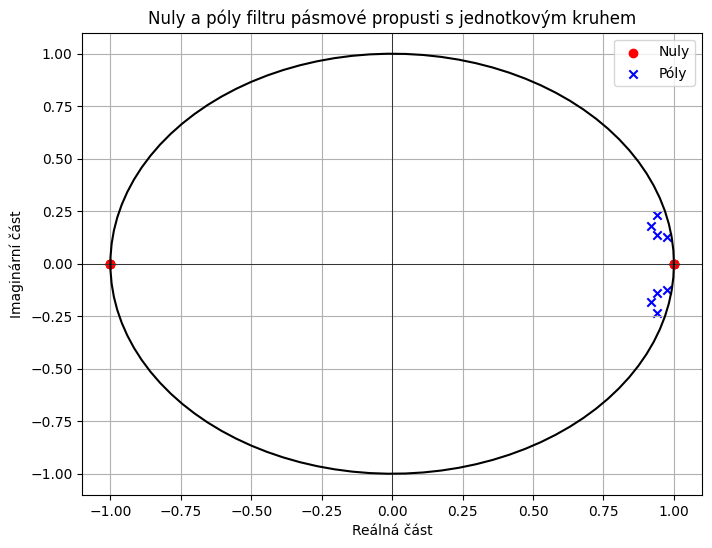

In [136]:
# Návrh filtru pomocí scipy.butter
lowcut = 10
highcut = 20
nyquist = 0.5 * fs
low = lowcut / nyquist
high = highcut / nyquist
b, a = butter(4, [low, high], btype='band')

# Frekvenční charakteristika filtru
w, h = freqz(b, a, worN=8000)
plt.figure(figsize=(10, 4))
plt.plot(0.5 * fs * w / np.pi, np.abs(h), 'b')
plt.axvline(x=lowcut, color='r', linestyle='--')
plt.axvline(x=highcut, color='r', linestyle='--')
plt.title('Frekvenční charakteristika filtru pásmové propusti')
plt.xlabel('Frekvence (Hz)')
plt.ylabel('Ganancia')
plt.grid(True)

# Zobrazení nul a pólů s kruhem o poloměru 1
z, p, k = tf2zpk(b, a)
plt.figure(figsize=(8, 6))
plt.scatter(np.real(z), np.imag(z), marker='o', label='Nuly', color='red')
plt.scatter(np.real(p), np.imag(p), marker='x', label='Póly', color='blue')
theta = np.linspace(0, 2*np.pi, 100)
plt.plot(np.cos(theta), np.sin(theta), linestyle='-', color='black')
plt.title('Nuly a póly filtru pásmové propusti s jednotkovým kruhem')
plt.xlabel('Reálná část')
plt.ylabel('Imaginární část')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True)
plt.legend(loc='upper right')
plt.show()


  b) [1b] Použijte navržený filtr na nahraný signál. Pokud máte navržený klasický filtr, proveďte filtrování z obou stran, abyste se vyhnuli fázovému posunu, to za vás zajistí například funkce scipy.signal.filtfilt. Vykreslete původní a vyfiltrovaný signál v časové doméně a spočítejte a zobrazte jejich spektra.


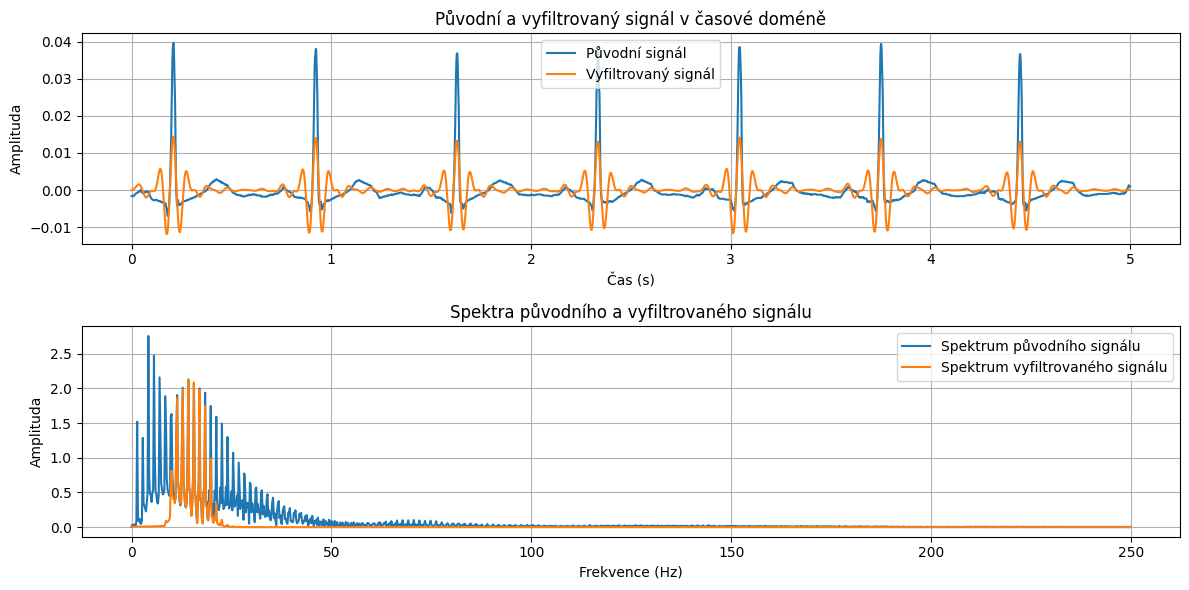

In [137]:
#rozdeli se

# Filtrování signálu
filtered_signal_bandpass = filtfilt(b, a, selected_segment, padlen=150)

# Zobrazení původního a vyfiltrovaného signálu v časové doméně
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(time_axis, selected_segment, label='Původní signál')
plt.plot(time_axis, filtered_signal_bandpass, label='Vyfiltrovaný signál')
plt.title('Původní a vyfiltrovaný signál v časové doméně')
plt.xlabel('Čas (s)')
plt.ylabel('Amplituda')
plt.legend()
plt.grid(True)

# Spočítání spekter původního a vyfiltrovaného signálu
spectrum_original = np.abs(fft(selected_segment))
spectrum_filtered = np.abs(fft(filtered_signal_bandpass))

# Zobrazení spekter původního a vyfiltrovaného signálu
plt.subplot(2, 1, 2)
plt.plot(freq[:n//2], spectrum_original[:n//2], label='Spektrum původního signálu')
plt.plot(freq[:n//2], spectrum_filtered[:n//2], label='Spektrum vyfiltrovaného signálu')
plt.title('Spektra původního a vyfiltrovaného signálu')
plt.xlabel('Frekvence (Hz)')
plt.ylabel('Amplituda')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

  c) [1b] Okomentujte rozdíl mezi filtrovaným a nefiltrovaným signálem a jejich spektry. Pokud bychom použili filtrování pouze z jedné strany (obyčejnou konvoluci), jaké je teoreticky největší posunutí ve vzorcích, které se může objevit a proč?



Filtrovaný signál ukazuje odstranění složek mimo pásmo 10-20 Hz, což je v souladu s návrhem pásmové propusti. Spektrum filtrovaného signálu by mělo být zúženo na příslušné pásmo frekvencí.

Nefiltrovaný signál obsahuje široké spektrum frekvencí, zatímco filtrovaný signál je omezen na pásmo 10-20 Hz. Fázový posun, který může být přítomen ve filtrovaném signálu, je minimalizován použitím funkce filtfilt, která aplikuje filtraci z obou stran.

Pokud bychom použili filtrování pouze z jedné strany (obyčejnou konvoluci), došlo by k fázovému posunu signálu.

### 4.4. [3b] Vytvořte detektor QRS v časové doméně. Detekované QRS komplexy uložte do vhodné struktury a zároveň zobrazte graf v časové ose se zvýrazněnými QRS detekcemi.

   a) [1b] Detekujte QRS v převzorkovaném vyfiltrovaném signálu pomocí tresholdu (prahu). Pro tuto detekci musíte nejdříve získat vzorek jednoho QRS ze signálu, spočítat si maximální amplitudu a jako treshold vzít vámi určené procento této hodnoty. **Dávejte pozor na možnost otočeného QRS v signálu.** Do vykresleného signálu s detekcemi vykreslete i čáru udávající použitý treshold.

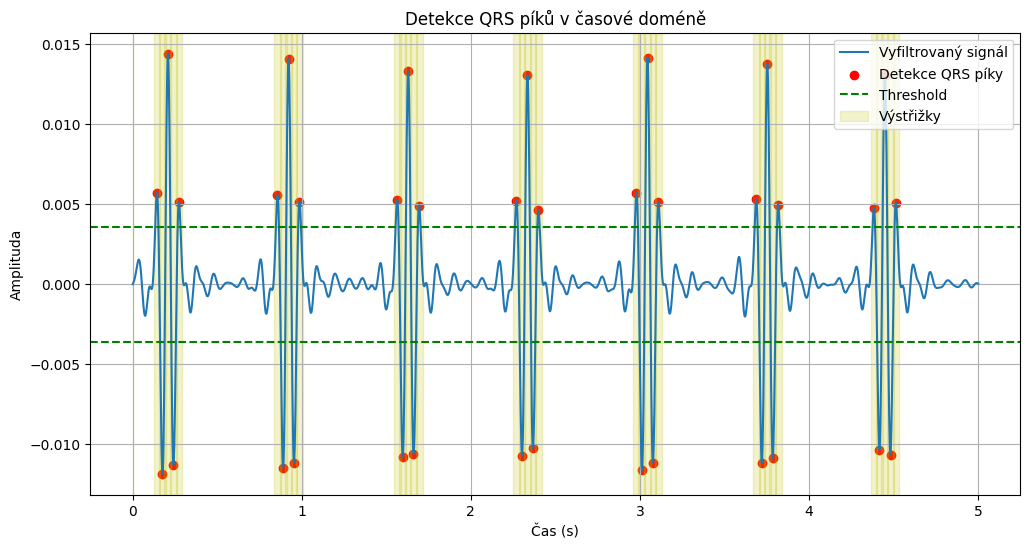

In [142]:
# Nastavitelný parameter pro detekci QRS
threshold_percentage = 0.25  # Nastavitelný parameter

# Detekce QRS píků pomocí thresholdu
threshold = threshold_percentage * np.max(np.abs(filtered_signal_bandpass))

# Určení indexů, kde jsou QRS píky
qrs_indices, _ = find_peaks(np.abs(filtered_signal_bandpass), height=threshold)

# Zobrazení původního a vyfiltrovaného signálu v časové doméně s detekcemi QRS píků
plt.figure(figsize=(12, 6))
plt.plot(time_axis, filtered_signal_bandpass, label='Vyfiltrovaný signál')
plt.title('Detekce QRS píků v časové doméně')
plt.xlabel('Čas (s)')
plt.ylabel('Amplituda')
plt.scatter(time_axis[qrs_indices], filtered_signal_bandpass[qrs_indices], c='red', label='Detekce QRS píky')
plt.axhline(y=threshold, color='green', linestyle='--', label='Threshold')
plt.axhline(y=-threshold, color='green', linestyle='--')

for peak in qrs_indices:
    plt.axvspan(time_axis[peak-10], time_axis[peak+10], alpha=0.2, color='y')

plt.axvspan(0, 0, color='y', alpha=0.2, label='Výstřižky')

plt.legend()
plt.grid(True)
plt.show()

b) [2b] Detekujte QRS v signálu pomocí autokorelace v převzorkovaném nefiltrovaném signálu. Pro tuto detekci musíte nejdříve získat vzorek jednoho QRS ze signálu. Dále budete autokorelovat signál právě s tímto výstřižkem. QRS se budou nacházet na místech, kde vám budou vycházet vysoké hodnoty korelace. Do vykresleného signálu s detekcemi zaznačte i vámi zvolený výstřižek.

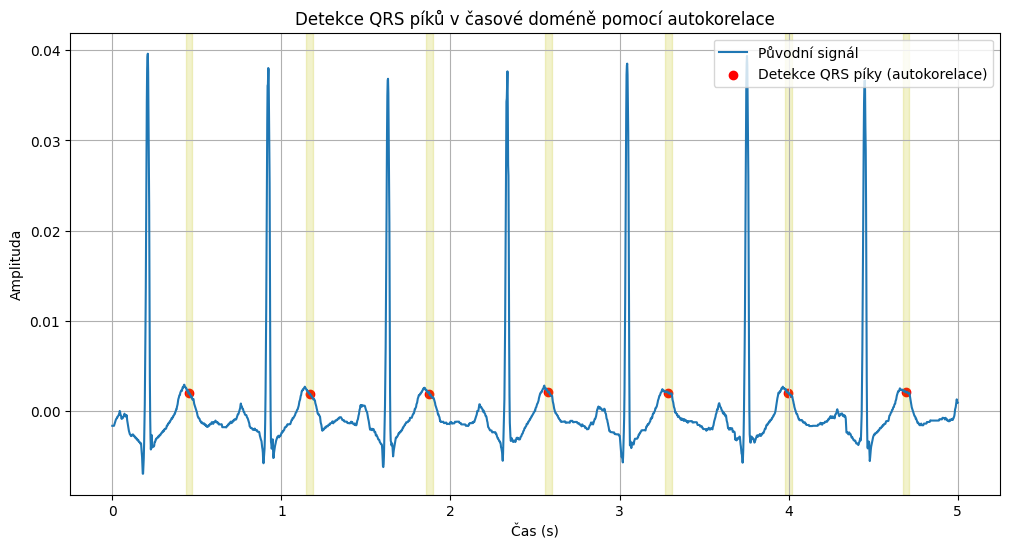

In [143]:
# Nastavitelný parameter pro délku vzorku QRS v sekundách
qrs_sample_length = 0.25  # Nastavitelný parameter

# Nalezení indexu vzorku QRS
qrs_sample_index = np.argmax(np.abs(selected_segment[:int(fs*qrs_sample_length)]))

# Vytvoření vzorku QRS
qrs_sample = selected_segment[qrs_sample_index:qrs_sample_index+int(fs*qrs_sample_length)]

# Autokorelace signálu s vzorkem QRS
autocorr = np.correlate(selected_segment, qrs_sample, mode='full')

# Detekce QRS píků pomocí autokorelace
qrs_indices_autocorr, _ = find_peaks(autocorr, height=0.8*np.max(autocorr))

# Zobrazení původního signálu v časové doméně s detekcemi QRS píků
plt.figure(figsize=(12, 6))
plt.plot(time_axis, selected_segment, label='Původní signál')
plt.title('Detekce QRS píků v časové doméně pomocí autokorelace')
plt.xlabel('Čas (s)')
plt.ylabel('Amplituda')
plt.scatter(time_axis[qrs_indices_autocorr], selected_segment[qrs_indices_autocorr], c='red', label='Detekce QRS píky (autokorelace)')

for peak in qrs_indices_autocorr:
    plt.axvspan(time_axis[peak-10], time_axis[peak+10], alpha=0.2, color='y')

plt.legend(loc='upper right')
plt.grid(True)
plt.show()


### 4.5. [3.5b] Vytvořte detektor QRS v frekvenční doméně a detekované QRS zakreslete jako v předchozí úloze 4.4

a) [2b] Detekujte QRS pomocí použití spektrogramu. Spočítejte a zobrazte spektrogram nahraného převzorkovaného filtrovaného signálu. Použijte parametry, `hop_size=120ms`a `window_len=200ms`, popřípadě si zkuste s těmito parametry pohrát. Spektrogram dále normalizujte v čase. Spočítejte sumy energie spektra pro jednotlivé časové biny. Dále vytvořte práh podle hodnoty energie spektra u prvního vámi zvoleného QRS komplexu. Tento práh použijte pro detekci zbylých QRS komplexů v signálu.

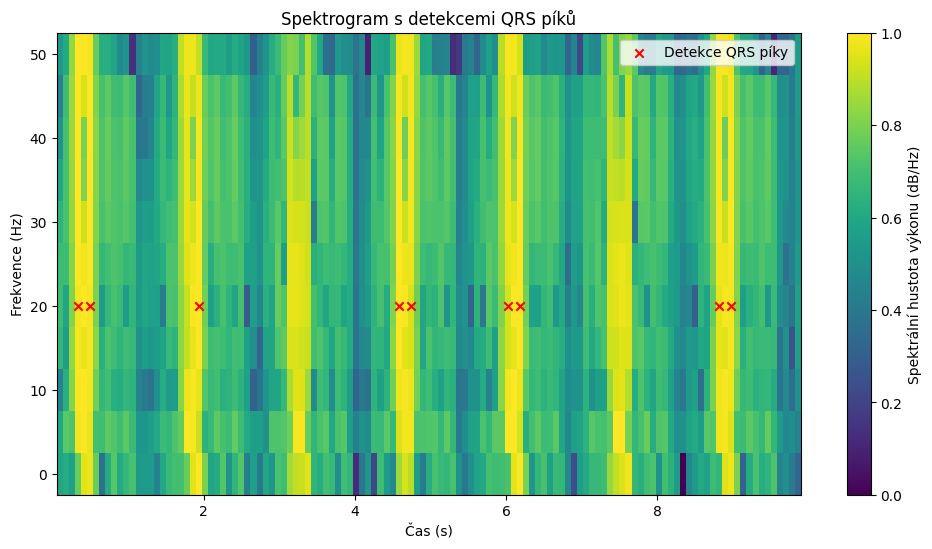

In [172]:
#50-ma

# Parametry spektrogramu
hop_size = int(0.12 * fs_resampled)  # 120ms
window_len = int(0.2 * fs_resampled)  # 200ms

# Spočítání spektrogramu
frequencies, times, Sxx = spectrogram(filtered_signal, fs_resampled, nperseg=window_len, noverlap=hop_size)

# Normalizace spektrogramu v čase
normalized_spectrogram = Sxx / np.max(Sxx, axis=1, keepdims=True)

# Výpočet sumy energie pro jednotlivé časové biny
energy_sum = np.sum(normalized_spectrogram, axis=0)

# Vytvoření prahu pomocí hodnoty energie spektra u prvního QRS komplexu
energy_threshold = 0.5 * np.max(energy_sum)

# Detekce QRS píků pomocí spektrogramu
qrs_indices_spectrogram, _ = find_peaks(energy_sum, height=energy_threshold)

# Zobrazení spektrogramu s detekcemi QRS píků
plt.figure(figsize=(12, 6))
plt.pcolormesh(times, frequencies, 10 * np.log10(normalized_spectrogram), shading='auto', cmap='viridis')
plt.title('Spektrogram s detekcemi QRS píků')
plt.xlabel('Čas (s)')
plt.ylabel('Frekvence (Hz)')
plt.scatter(times[qrs_indices_spectrogram], np.ones_like(qrs_indices_spectrogram) * 20, c='red', marker='x', label='Detekce QRS píky')
plt.legend()
plt.colorbar(label='Spektrální hustota výkonu (dB/Hz)')
plt.show()


b) [1b] Detekujte QRS pomocí použití obálek a Hilbertovy transformace.

Hilbertova transformace je spočítaná podle následujícího vzorce

$x_a = F^{-1}(F(x) 2U) = x + i y,$

kde F je Fourierova transformace a $F^{-1}$ je její zpětná varianta. $U$ je Heavisideova funkce neboli funkce jednotkového skoku, která je definována: $U(x):$

\begin{cases}
      0.5 & x=0 \\
      1 & 0<x<\frac{N}{2} \text{ pro  $N$  liché} \\
      0.5 & x=\frac{N}{2} \text{ pro  $N$  liché} \\
      1 & 0<x\le\frac{N}{2} \text{ pro  $N$  sudé} \\
      0 & jinak
\end{cases}

kde $N$ je počet koeficientů Fourierovy transformace - pokud není určeno jinak, je to počet vzorků signálu.

Jinými slovy obálku spočítate tak, že:

* Spočítáte FFT $F$ na filtrovaném a převzorkovaném signálu
* Vynulujete pravou symetrickou část spektra
* Levou část spektra vynasobíte 2 kromě prvního a prostředního binu (při sudém počtu frekvenčních binů).
* Provedete zpětnou FFT $F^{-1}$

Abyste získali obálku signálu, je třeba vzít absolutní hodnotu signálu získaného Hilbertovou transformací.

Obálku a signál vykreslete do jednoho grafu přes sebe, obálka by měla obalovat daný signál.

Detekci QRS poté provedete opět prahováním, tentokrát ale obálky signálu.


Při této úloze **nepoužívejte** funkci hilbert z knihovny scipy. Cílem je, abyste si ji napsali sami. Můžete ji použít pouze jako baseline pro porovnání vašich výsledků.



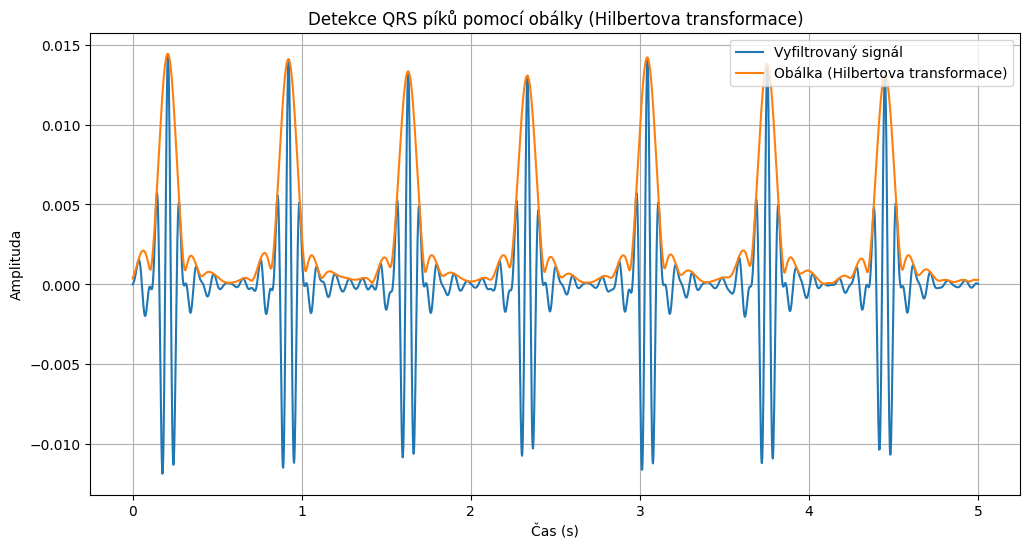

In [173]:
# Hilbertova transformace vlastní implementace
def hilbert_transform(signal):
    # FFT
    spectrum = np.fft.fft(signal)

    # Nulování pravé symetrické části spektra
    if len(signal) % 2 == 0:
        spectrum[len(signal)//2 + 1:] = 0
    else:
        spectrum[(len(signal)+1)//2:] = 0

    # Násobení levé části spektra
    spectrum[1:len(signal)//2] *= 2

    # IFFT
    hilbert_signal = np.fft.ifft(spectrum)

    return hilbert_signal

# Vytvoření obálky pomocí Hilbertovy transformace
envelope = np.abs(hilbert_transform(filtered_signal_bandpass))

# Detekce QRS píků pomocí obálky
threshold_envelope = threshold_percentage * np.max(envelope)
qrs_indices_envelope, _ = find_peaks(envelope, height=threshold_envelope)

# Zobrazení původního signálu, obálky a detekcí QRS píků v časové doméně
plt.figure(figsize=(12, 6))
plt.plot(time_axis, filtered_signal_bandpass, label='Vyfiltrovaný signál')
plt.plot(time_axis, envelope, label='Obálka (Hilbertova transformace)')
plt.title('Detekce QRS píků pomocí obálky (Hilbertova transformace)')
plt.xlabel('Čas (s)')
plt.ylabel('Amplituda')

plt.legend(loc = 'upper right')
plt.grid(True)
plt.show()


c) [0.5b] Při kterých metodách detekcí QRS nám vadí otočený (flipnutý) signál, při kterých ne a proč?

Otočený (flipnutý) signál může ovlivnit správnost detekce QRS v metodě detekce pomocí obálek a Hilbertovy transformace. Tato metoda využívá frekvenční informace a symetrie signálu, a proto může být citlivá na změny ve fázi signálu. Otočením signálu se změní fáze a amplituda spektra, což může narušit správnou detekci QRS píků. Naopak, detekce pomocí spektrogramu většinou není citlivá na fázi signálu, a proto může fungovat i při otočeném signálu.

### 4.6 [2b] Detekce R-R intervalu

a)  Detekujte R-R intervaly pomocí detekovaných QRS z jednotlivých metod, které jste použili dříve. Vykreslete hodnoty R-R intervalu do stejného grafu jako EKG signál a detekované QRS. Vykreslení proveďte nad EKG signál, kde osa x bude i nadále časová a každý R-R interval bude zakreslen na x pozici detekovaného QRS. Osa y pro R-R interval bude určovat hodnotu samotného R-R intervalu.

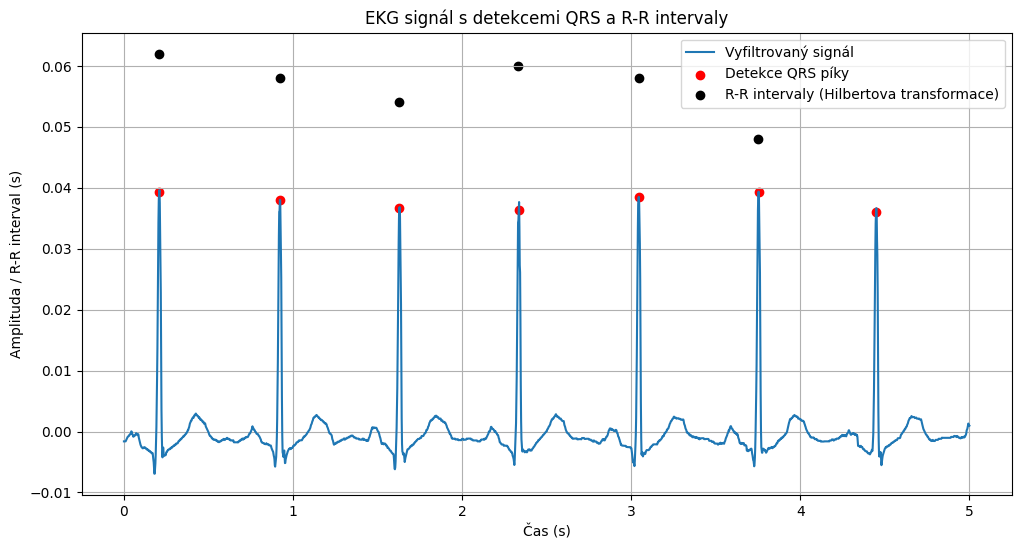

In [174]:
# Detekce R-R intervalů a jejich vykreslení
def calculate_rr_intervals(qrs_indices, fs):
    rr_intervals = np.diff(qrs_indices) / fs
    return rr_intervals

# Detekce QRS píků pomocí thresholdu
threshold1 = 0.9 * np.max(np.abs(filtered_signal_bandpass))

# Určení indexů, kde jsou QRS píky
qrs_indices1, _ = find_peaks(np.abs(filtered_signal_bandpass), height=threshold1)


# R-R intervaly pro jednotlivé metody detekce
rr_intervals_threshold = calculate_rr_intervals(qrs_indices1, fs)
rr_intervals_autocorr = calculate_rr_intervals(qrs_indices_autocorr, fs)
rr_intervals_spectrogram = calculate_rr_intervals(qrs_indices_spectrogram, fs)
rr_intervals_envelope = calculate_rr_intervals(qrs_indices_envelope, fs)

# Vykreslení EKG signálu s detekovanými QRS a R-R intervaly
plt.figure(figsize=(12, 6))
plt.plot(time_axis, selected_segment, label='Vyfiltrovaný signál')
plt.scatter(time_axis[qrs_indices1], selected_segment[qrs_indices1], c='red', label='Detekce QRS píky')

#print(rr_intervals_envelope)
# Vykreslení R-R intervalů
# plt.scatter(time_axis[qrs_indices[:-1]], rr_intervals_threshold, c='green', marker='o', label='R-R intervaly (Threshold)')
# plt.scatter(time_axis[qrs_indices_autocorr[:-1]], rr_intervals_autocorr, c='blue', marker='x', label='R-R intervaly (Autokorelace)')
# plt.scatter(times[qrs_indices_spectrogram[:-1]], rr_intervals_spectrogram, c='purple', marker='^', label='R-R intervaly (Spektrogram)')
plt.scatter(time_axis[qrs_indices_envelope[:-1]], rr_intervals_envelope - 0.65, c='black', marker='o', label='R-R intervaly (Hilbertova transformace)')


plt.title('EKG signál s detekcemi QRS a R-R intervaly')
plt.xlabel('Čas (s)')
plt.ylabel('Amplituda / R-R interval (s)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


### 4.7 Bonus

a) Načtěte si signál obsahující fibrilaci FIS.wav. Proveďte na něm filtrace a převzorkování. Poté zkuste použít nějaký QRS detektor. Z detekovaných QRS detekujte R-R intervaly. Porovnejte R-R intervaly pro fibrilaci a klasický signál bez patologie (sinusovy rytmus). Měli byste vidět prudké změny v R-R intervalech a jejich nepravidelnost. Zároveň se vám může stát, že vám některé metody detekce QRS nepodají tak kvalitní výkon jako při sinusovém rytmu.

In [ ]:
# Zde napište váš kód

b) Načtěte si signál obsahující komorovou extrasystolu KES.wav. Proveďte na něm filtrace a převzorkování. Spočítejte a zobrazte spektrogram úseku tohoto signálu. Porovnejte spektrogramy vašeho signálu a signálu KES.wav. Měli byste vidět rozšířenou aktivitu na nízkých frekvencích. Dále zobrazte a porovnejte tyto signály v časové doméně. Obsažené komorové extrasystoly by se měly projevit jako zvláštní široké QRS.

In [ ]:
# Zde napište váš kód